# Figure 1

## Scaling law model

### SGC(P)-P 

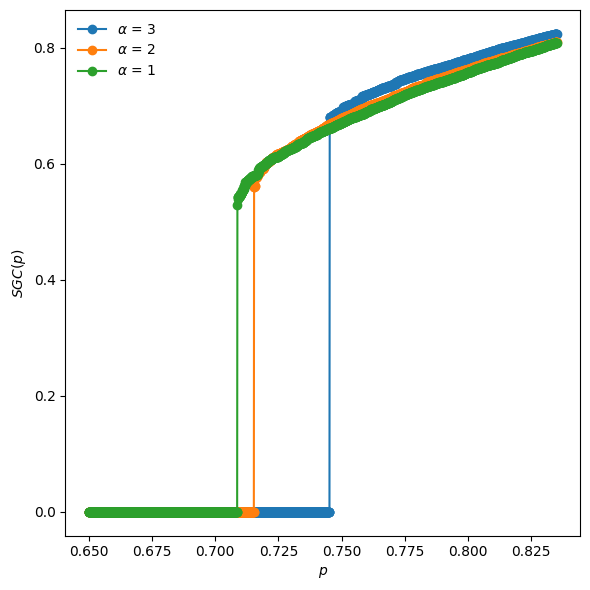

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Load data
FOLDER_PATH = os.path.join('../../example/fig1/Scaling-law')
X_VALUES = np.linspace(0.9, 0.5, 4001)
MASK = (X_VALUES >= 0.65) & (X_VALUES <= 0.835)

TARGET_FILES = {
    "100_avedeg20_1_graph3_run1_SGC_data.npy": 1,
    "100_avedeg20_2_graph3_run1_SGC_data.npy": 2,
    "100_avedeg20_3_graph3_run1_SGC_data.npy": 3,
}

data_dict = {}
for filename, lambda_value in TARGET_FILES.items():
    file_path = os.path.join(FOLDER_PATH, filename)
    
    # Check if the file exists
    if os.path.exists(file_path):
        data = np.load(file_path, allow_pickle=True)
        data_dict[lambda_value] = data
    else:
        print(f"File not found: {file_path}")

# Sort data by lambda in descending order
sorted_data = dict(sorted(data_dict.items(), reverse=True))

# Plot
plt.figure(figsize=(6, 6))
for i, (lambda_value, data) in enumerate(sorted_data.items()):
    plt.plot(
        X_VALUES[MASK],
        data[MASK],
        label=rf'$\alpha$ = {lambda_value}',  
        marker='o',
    )

plt.xlabel(r'$p$')
plt.ylabel(r'$SGC(p)$')
plt.legend(loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

### $P_c$-$\alpha$

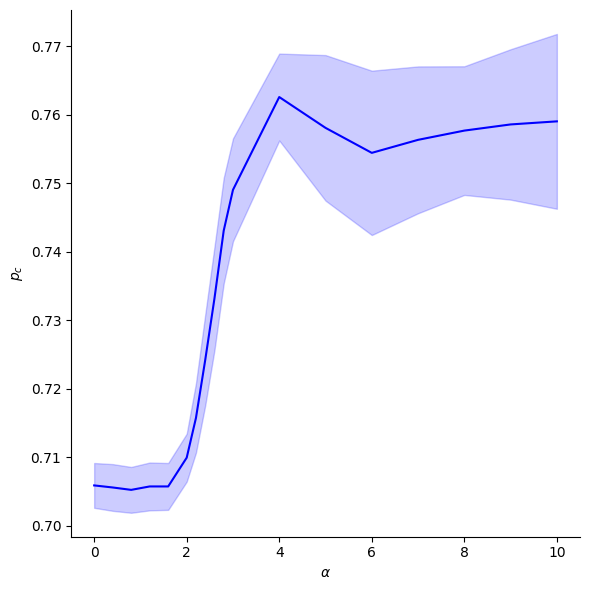

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Load data
save_path =  os.path.join('../../example/fig1/Pc-Scaling-law')
zetalist = [0, 0.4, 0.8, 1.2, 1.6, 2, 2.2, 2.4, 2.6, 2.8, 3, 4, 5, 6, 7, 8, 9, 10]

files = [f for f in os.listdir(save_path) if f.endswith('.npy')]
zeta_values, pc_mean_values, pc_std_values = [], [], []

for file in files:
    zeta = float(file.split('_')[2].replace('.npy', ''))

    if zeta in zetalist:
        file_path = os.path.join(save_path, file)
        pc_values = np.load(file_path)

        zeta_values.append(zeta)
        pc_mean_values.append(np.mean(pc_values))
        pc_std_values.append(np.std(pc_values))

# Sort data by zeta
sorted_indices = np.argsort(zeta_values)
zeta_values = np.array(zeta_values)[sorted_indices]
pc_mean_values = np.array(pc_mean_values)[sorted_indices]
pc_std_values = np.array(pc_std_values)[sorted_indices]

# Plot setup
plt.figure(figsize=(6, 6))
plt.plot(zeta_values, pc_mean_values, label=r'$p_c$', color='blue')
plt.fill_between(zeta_values, 
                 pc_mean_values - pc_std_values, 
                 pc_mean_values + pc_std_values, 
                 alpha=0.2, color='blue')

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$p_c$')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## Exponential decay model

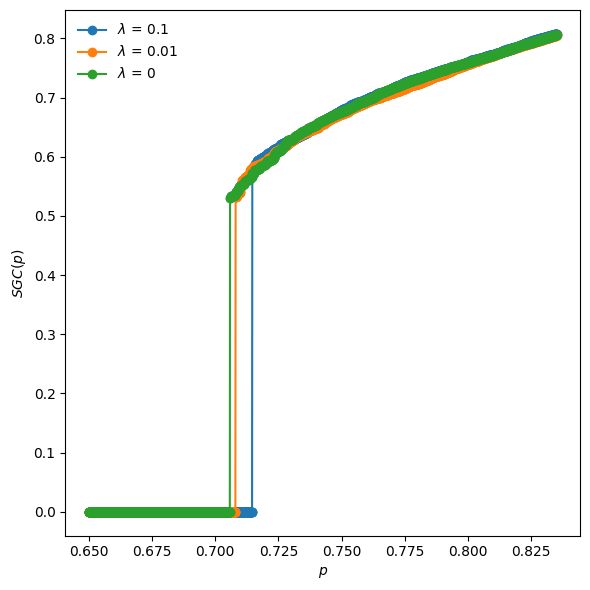

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Load data
FOLDER_PATH = os.path.join('../../example/fig1/Exponential-decay')
X_VALUES = np.linspace(0.9, 0.5, 4001)
MASK = (X_VALUES >= 0.65) & (X_VALUES <= 0.835)

TARGET_FILES = {
    "100_avedeg20_0_graph4_run4_SGC_data.npy": 0,
    "100_avedeg20_0.01_graph4_run4_SGC_data.npy": 0.01,
    "100_avedeg20_0.1_graph4_run4_SGC_data.npy": 0.1,
}

data_dict = {}
for filename, lambda_value in TARGET_FILES.items():
    file_path = os.path.join(FOLDER_PATH, filename)
    
    # Check if the file exists
    if os.path.exists(file_path):
        data = np.load(file_path, allow_pickle=True)
        data_dict[lambda_value] = data
    else:
        print(f"File not found: {file_path}")

# Sort data by lambda in descending order
sorted_data = dict(sorted(data_dict.items(), reverse=True))

# Plot
plt.figure(figsize=(6, 6))
for i, (lambda_value, data) in enumerate(sorted_data.items()):
    plt.plot(
        X_VALUES[MASK],
        data[MASK],
        label=rf'$\lambda$ = {lambda_value}',  
        marker='o',
    )

plt.xlabel(r'$p$')
plt.ylabel(r'$SGC(p)$')
plt.legend(loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

### $P_c$-$\lambda$

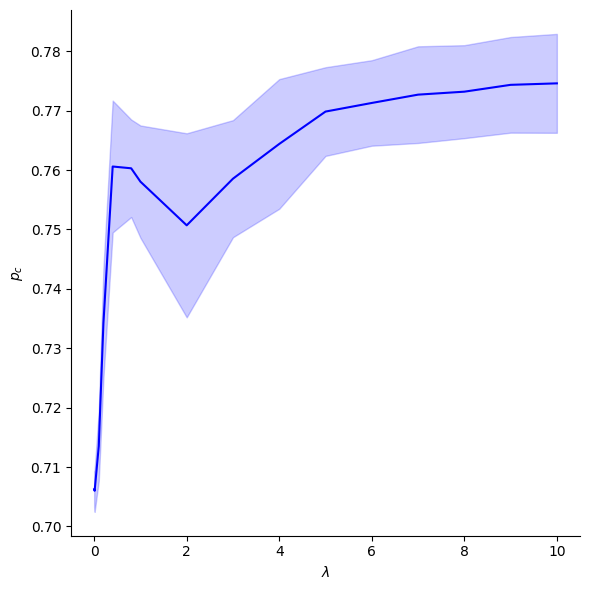

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Load data
save_path =  os.path.join('../../example/fig1/Pc-Exponential-decay')
zetalist = [0, 0.01, 0.1, 0.2, 0.4, 0.8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

files = [f for f in os.listdir(save_path) if f.endswith('.npy')]
zeta_values, pc_mean_values, pc_std_values = [], [], []

for file in files:
    zeta = float(file.split('_')[2].replace('.npy', ''))

    if zeta in zetalist:
        file_path = os.path.join(save_path, file)
        pc_values = np.load(file_path)

        zeta_values.append(zeta)
        pc_mean_values.append(np.mean(pc_values))
        pc_std_values.append(np.std(pc_values))

# Sort data by zeta
sorted_indices = np.argsort(zeta_values)
zeta_values = np.array(zeta_values)[sorted_indices]
pc_mean_values = np.array(pc_mean_values)[sorted_indices]
pc_std_values = np.array(pc_std_values)[sorted_indices]

# Plot setup
plt.figure(figsize=(6, 6))
plt.plot(zeta_values, pc_mean_values, label=r'$p_c$', color='blue')
plt.fill_between(zeta_values, 
                 pc_mean_values - pc_std_values, 
                 pc_mean_values + pc_std_values, 
                 alpha=0.2, color='blue')

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$p_c$')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Figure 3

## Scaling law model

### Max size

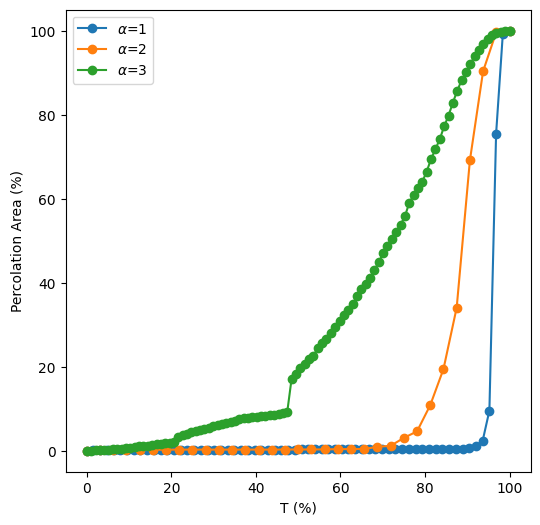

In [5]:
import os
import sys
import re
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('../area-estimation')))
from area_calculator import calculate_nucleus_area_with_connectors

# Load data
def load_matrix(filepath):
    return np.load(filepath)

def extract_step_number(filename):
    match = re.search(r'step(\d+)\.npy$', filename)
    return int(match.group(1)) if match else -1

# Process all files in folder and return Returns:second_max_areas ,num_steps ,max_areas
def process_folder(folder_path):
    files = sorted(
        [f for f in os.listdir(folder_path) if f.endswith('.npy')],
        key=extract_step_number
    )
    second_max_areas, max_areas = [], []

    for file in files:
        matrix = load_matrix(os.path.join(folder_path, file))
        areas = calculate_nucleus_area_with_connectors(matrix)
        
        if areas:
            unique_sorted = sorted(set(areas), reverse=True)
            max_areas.append(max(areas))
            second_max_areas.append(unique_sorted[1] if len(unique_sorted) >= 2 else 0)
        else:
            max_areas.append(0)
            second_max_areas.append(0)

    return np.array(second_max_areas), len(files), np.array(max_areas)

# Normalize steps
def normalize_steps(num_steps):
    return np.linspace(0, 100, num_steps) if num_steps > 1 else np.array([0, 100])

# Plot  maxsize curves
def max_plot_alpha_curves(folder_paths, labels):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    for idx, (path, label) in enumerate(zip(folder_paths, labels)):
        second_max, steps, max_areas = process_folder(path)       
        steps_norm = normalize_steps(steps)
        areas_norm = (max_areas / max_areas[-1]) * 100
        ax.plot(steps_norm, areas_norm, marker='o',label=label)
    
    ax.set_xlabel("T (%)")
    ax.set_ylabel("Percolation Area (%)")
    ax.legend(loc='best')
    plt.show()

# Plot second-largest curves
def second_plot_alpha_curves(folder_paths, labels):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    for idx, (path, label) in enumerate(zip(folder_paths, labels)):
        second_max, steps, max_areas = process_folder(path)       
        steps_norm = normalize_steps(steps)
        areas_norm = (second_max / max_areas[-1]) * 100
        ax.plot(steps_norm, areas_norm, marker='o',label=label)
    
    ax.set_xlabel("T (%)")
    ax.set_ylabel("Percolation Area (%)")
    ax.legend(loc='best')
    plt.show()

seed = 0
paths, labels = [], []
alphas = [1, 2, 3]
for alpha in alphas:
    path = os.path.join('../../example/fig3-4/powerlaw', 'matrix', str(alpha), str(seed))
    paths.append(path)
    labels.append(rf'$\alpha$={alpha}')
max_plot_alpha_curves(paths, labels)


### The second-largest

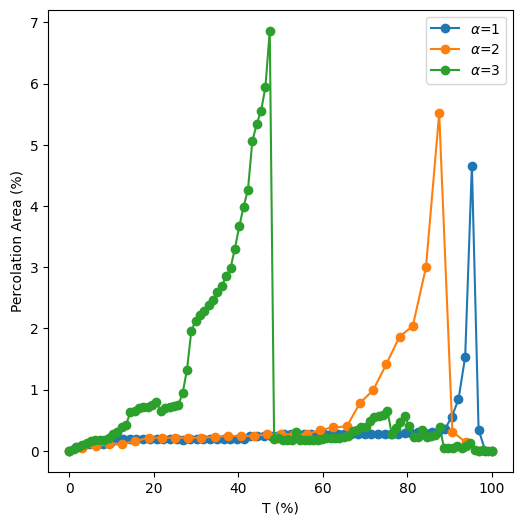

In [20]:
second_plot_alpha_curves(paths, labels)

## Exponential decay model

# Max size

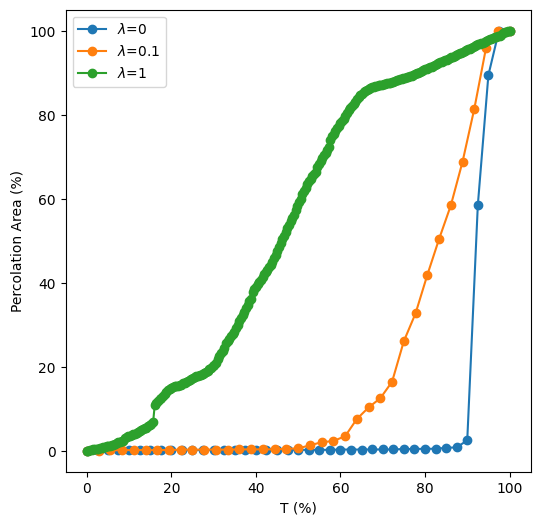

In [24]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from area_calculator import calculate_nucleus_area_with_connectors

# Load data
def load_matrix(filepath):
    return np.load(filepath)

def extract_step_number(filename):
    match = re.search(r'step(\d+)\.npy$', filename)
    return int(match.group(1)) if match else -1

# Process all files in folder and return Returns:second_max_areas ,num_steps ,max_areas
def process_folder(folder_path):
    files = sorted(
        [f for f in os.listdir(folder_path) if f.endswith('.npy')],
        key=extract_step_number
    )
    second_max_areas, max_areas = [], []

    for file in files:
        matrix = load_matrix(os.path.join(folder_path, file))
        areas = calculate_nucleus_area_with_connectors(matrix)
        
        if areas:
            unique_sorted = sorted(set(areas), reverse=True)
            max_areas.append(max(areas))
            second_max_areas.append(unique_sorted[1] if len(unique_sorted) >= 2 else 0)
        else:
            max_areas.append(0)
            second_max_areas.append(0)

    return np.array(second_max_areas), len(files), np.array(max_areas)

# Normalize steps
def normalize_steps(num_steps):
    return np.linspace(0, 100, num_steps) if num_steps > 1 else np.array([0, 100])

# Plot max_areas_plot_curves 
def max_areas_plot_lambda_curves(folder_paths, labels):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    for idx, (path, label) in enumerate(zip(folder_paths, labels)):
        second_max, steps, max_areas = process_folder(path)       
        steps_norm = normalize_steps(steps)
        areas_norm = (max_areas / max_areas[-1]) * 100
        ax.plot(steps_norm, areas_norm, marker='o',label=label)
    
    ax.set_xlabel("T (%)")
    ax.set_ylabel("Percolation Area (%)")
    ax.legend(loc='best')
    plt.show()
    plt.close()

# Plot second_areas_plot_lambda_curves
def second_areas_plot_lambda_curves(folder_paths, labels):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    for idx, (path, label) in enumerate(zip(folder_paths, labels)):
        second_max, steps, max_areas = process_folder(path)       
        steps_norm = normalize_steps(steps)
        areas_norm = (second_max / max_areas[-1]) * 100
        ax.plot(steps_norm, areas_norm, marker='o',label=label)
    
    ax.set_xlabel("T (%)")
    ax.set_ylabel("Percolation Area (%)")
    ax.legend(loc='best')
    plt.show()
    plt.close()

seed = 5
paths, labels = [], []
zeta = [0, 0.1, 1]
for alpha in zeta:
    path = os.path.join('../../example/fig3-4/lambdalaw', 'matrix', str(alpha), str(seed))
    paths.append(path)
    labels.append(rf'$\lambda$={alpha}')
max_areas_plot_lambda_curves(paths, labels)


### The second-largest

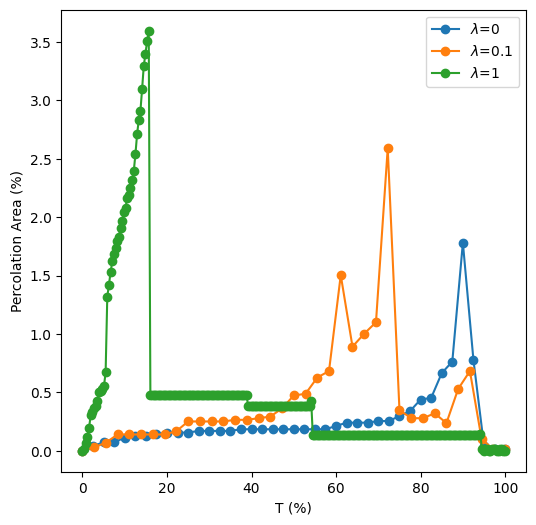

In [25]:
second_areas_plot_lambda_curves(paths, labels)

# Figure 4

## Scaling law model

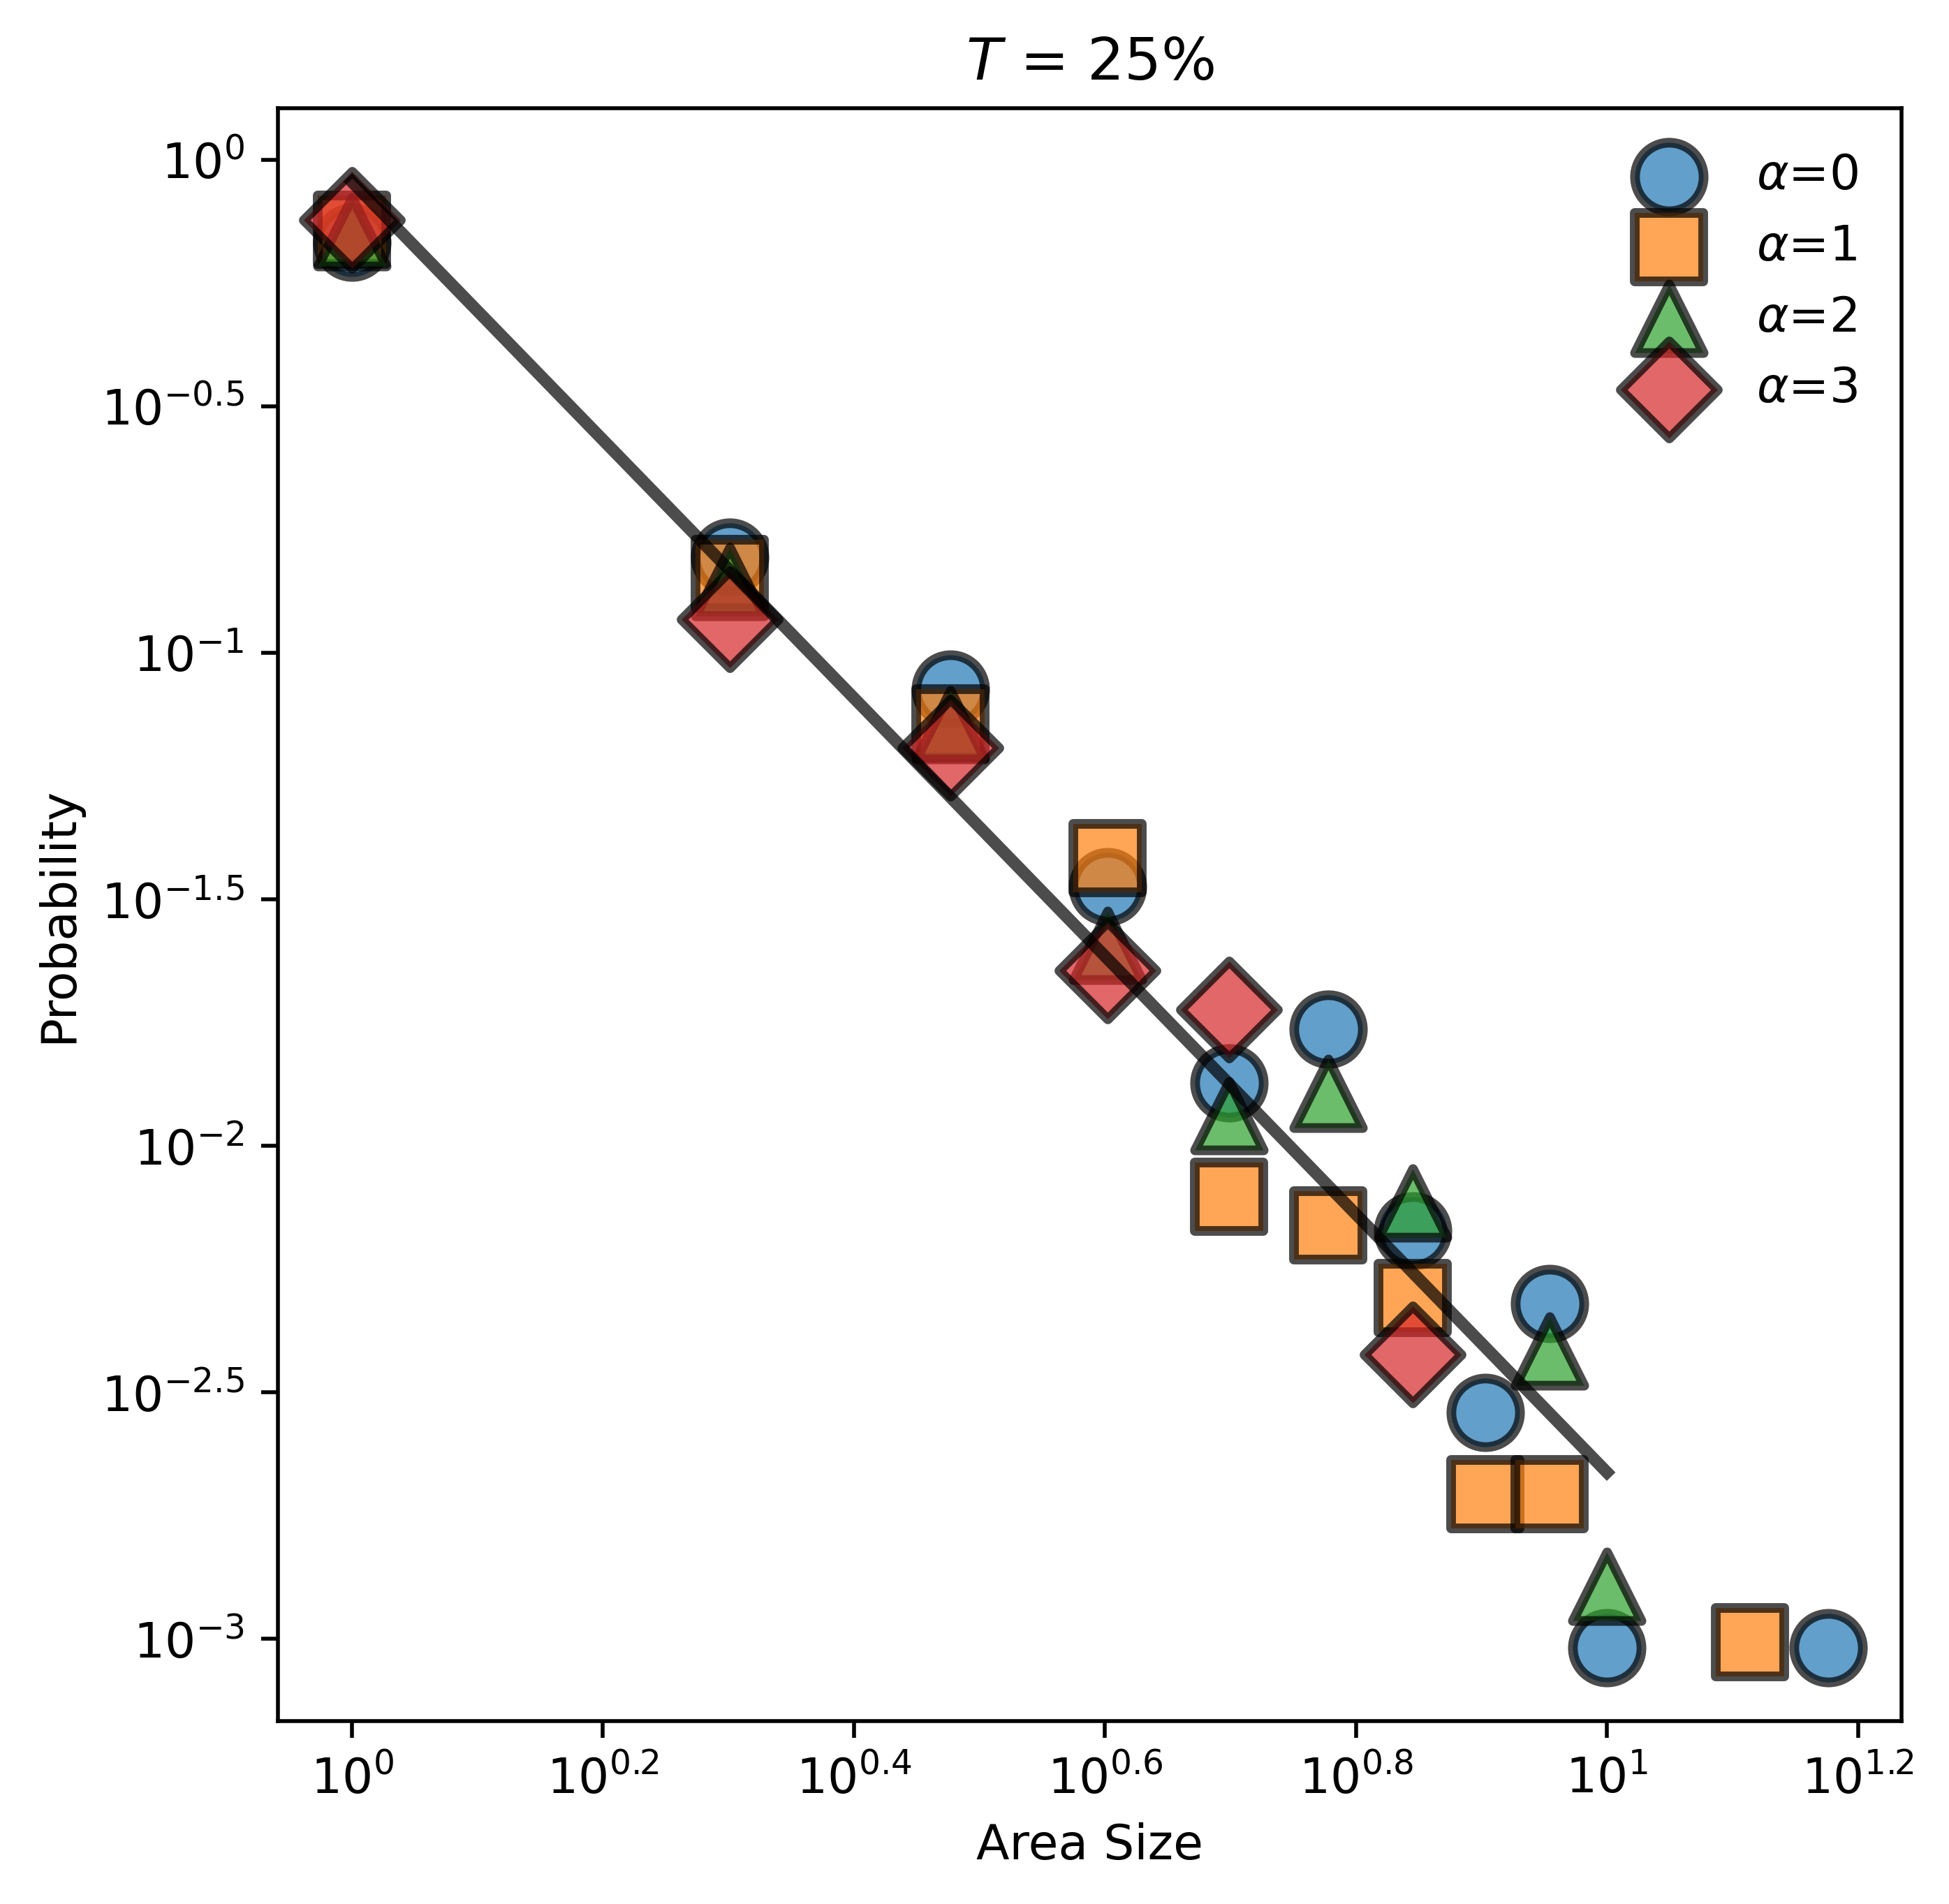

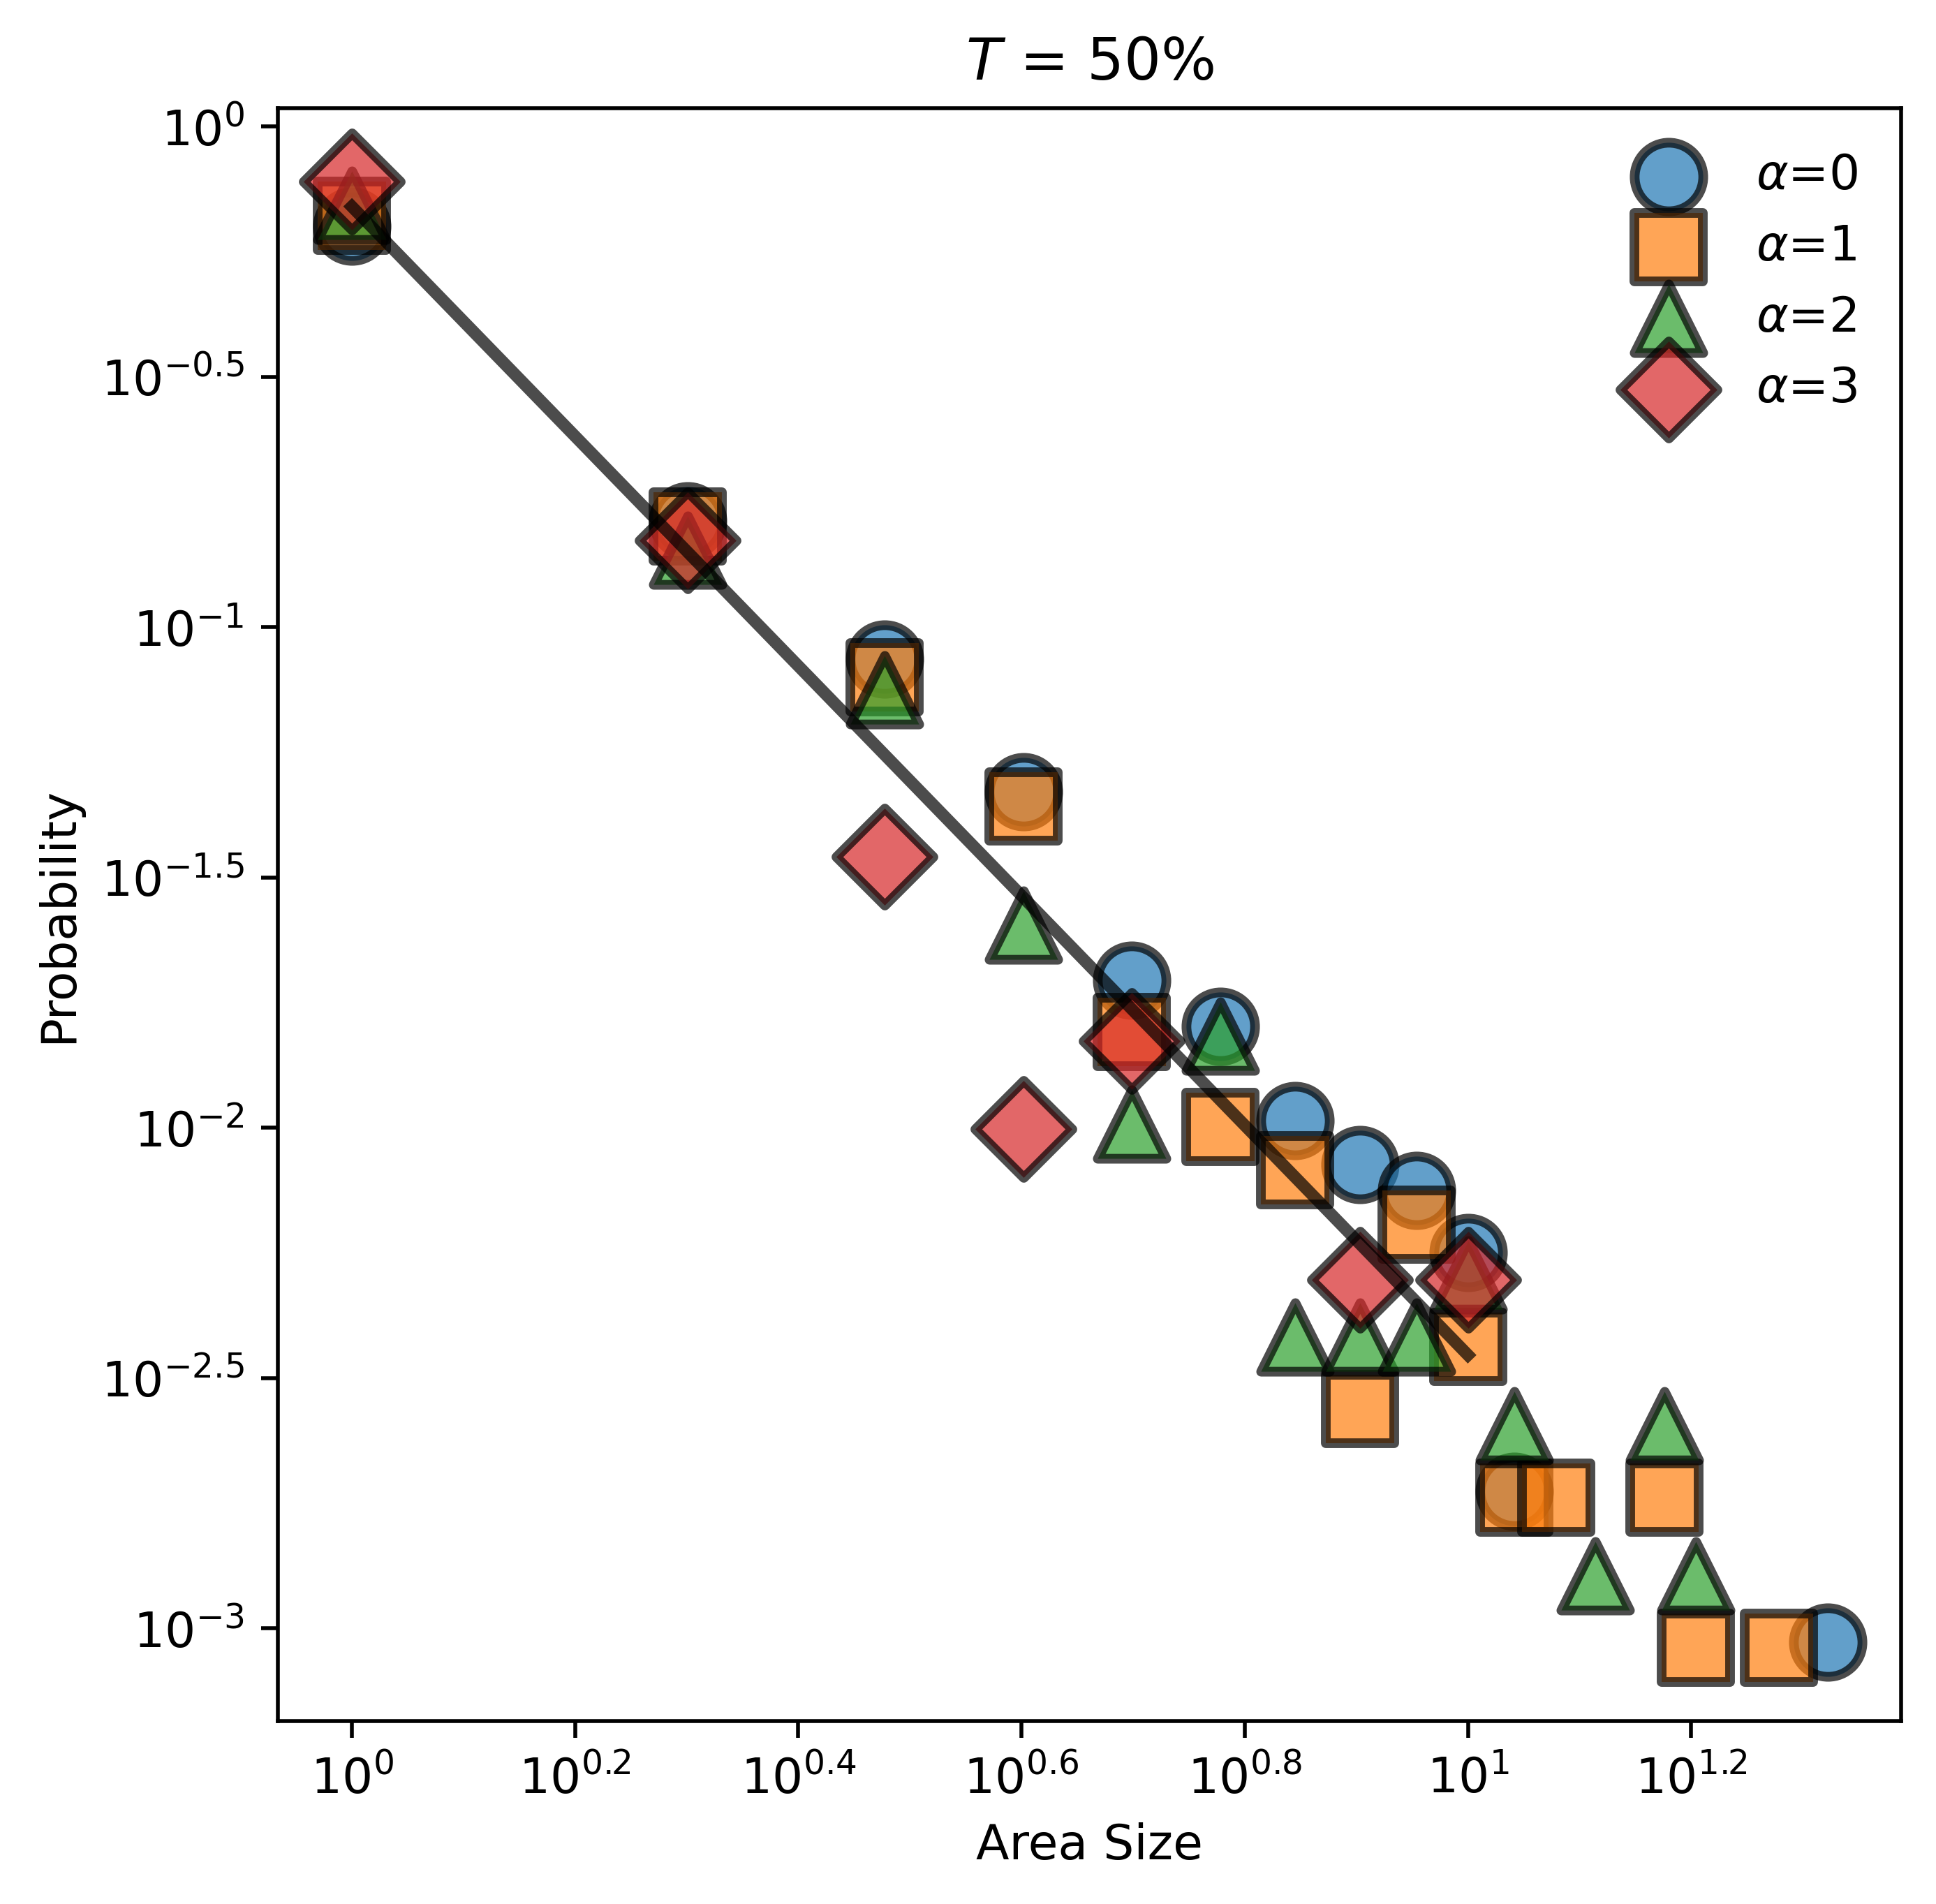

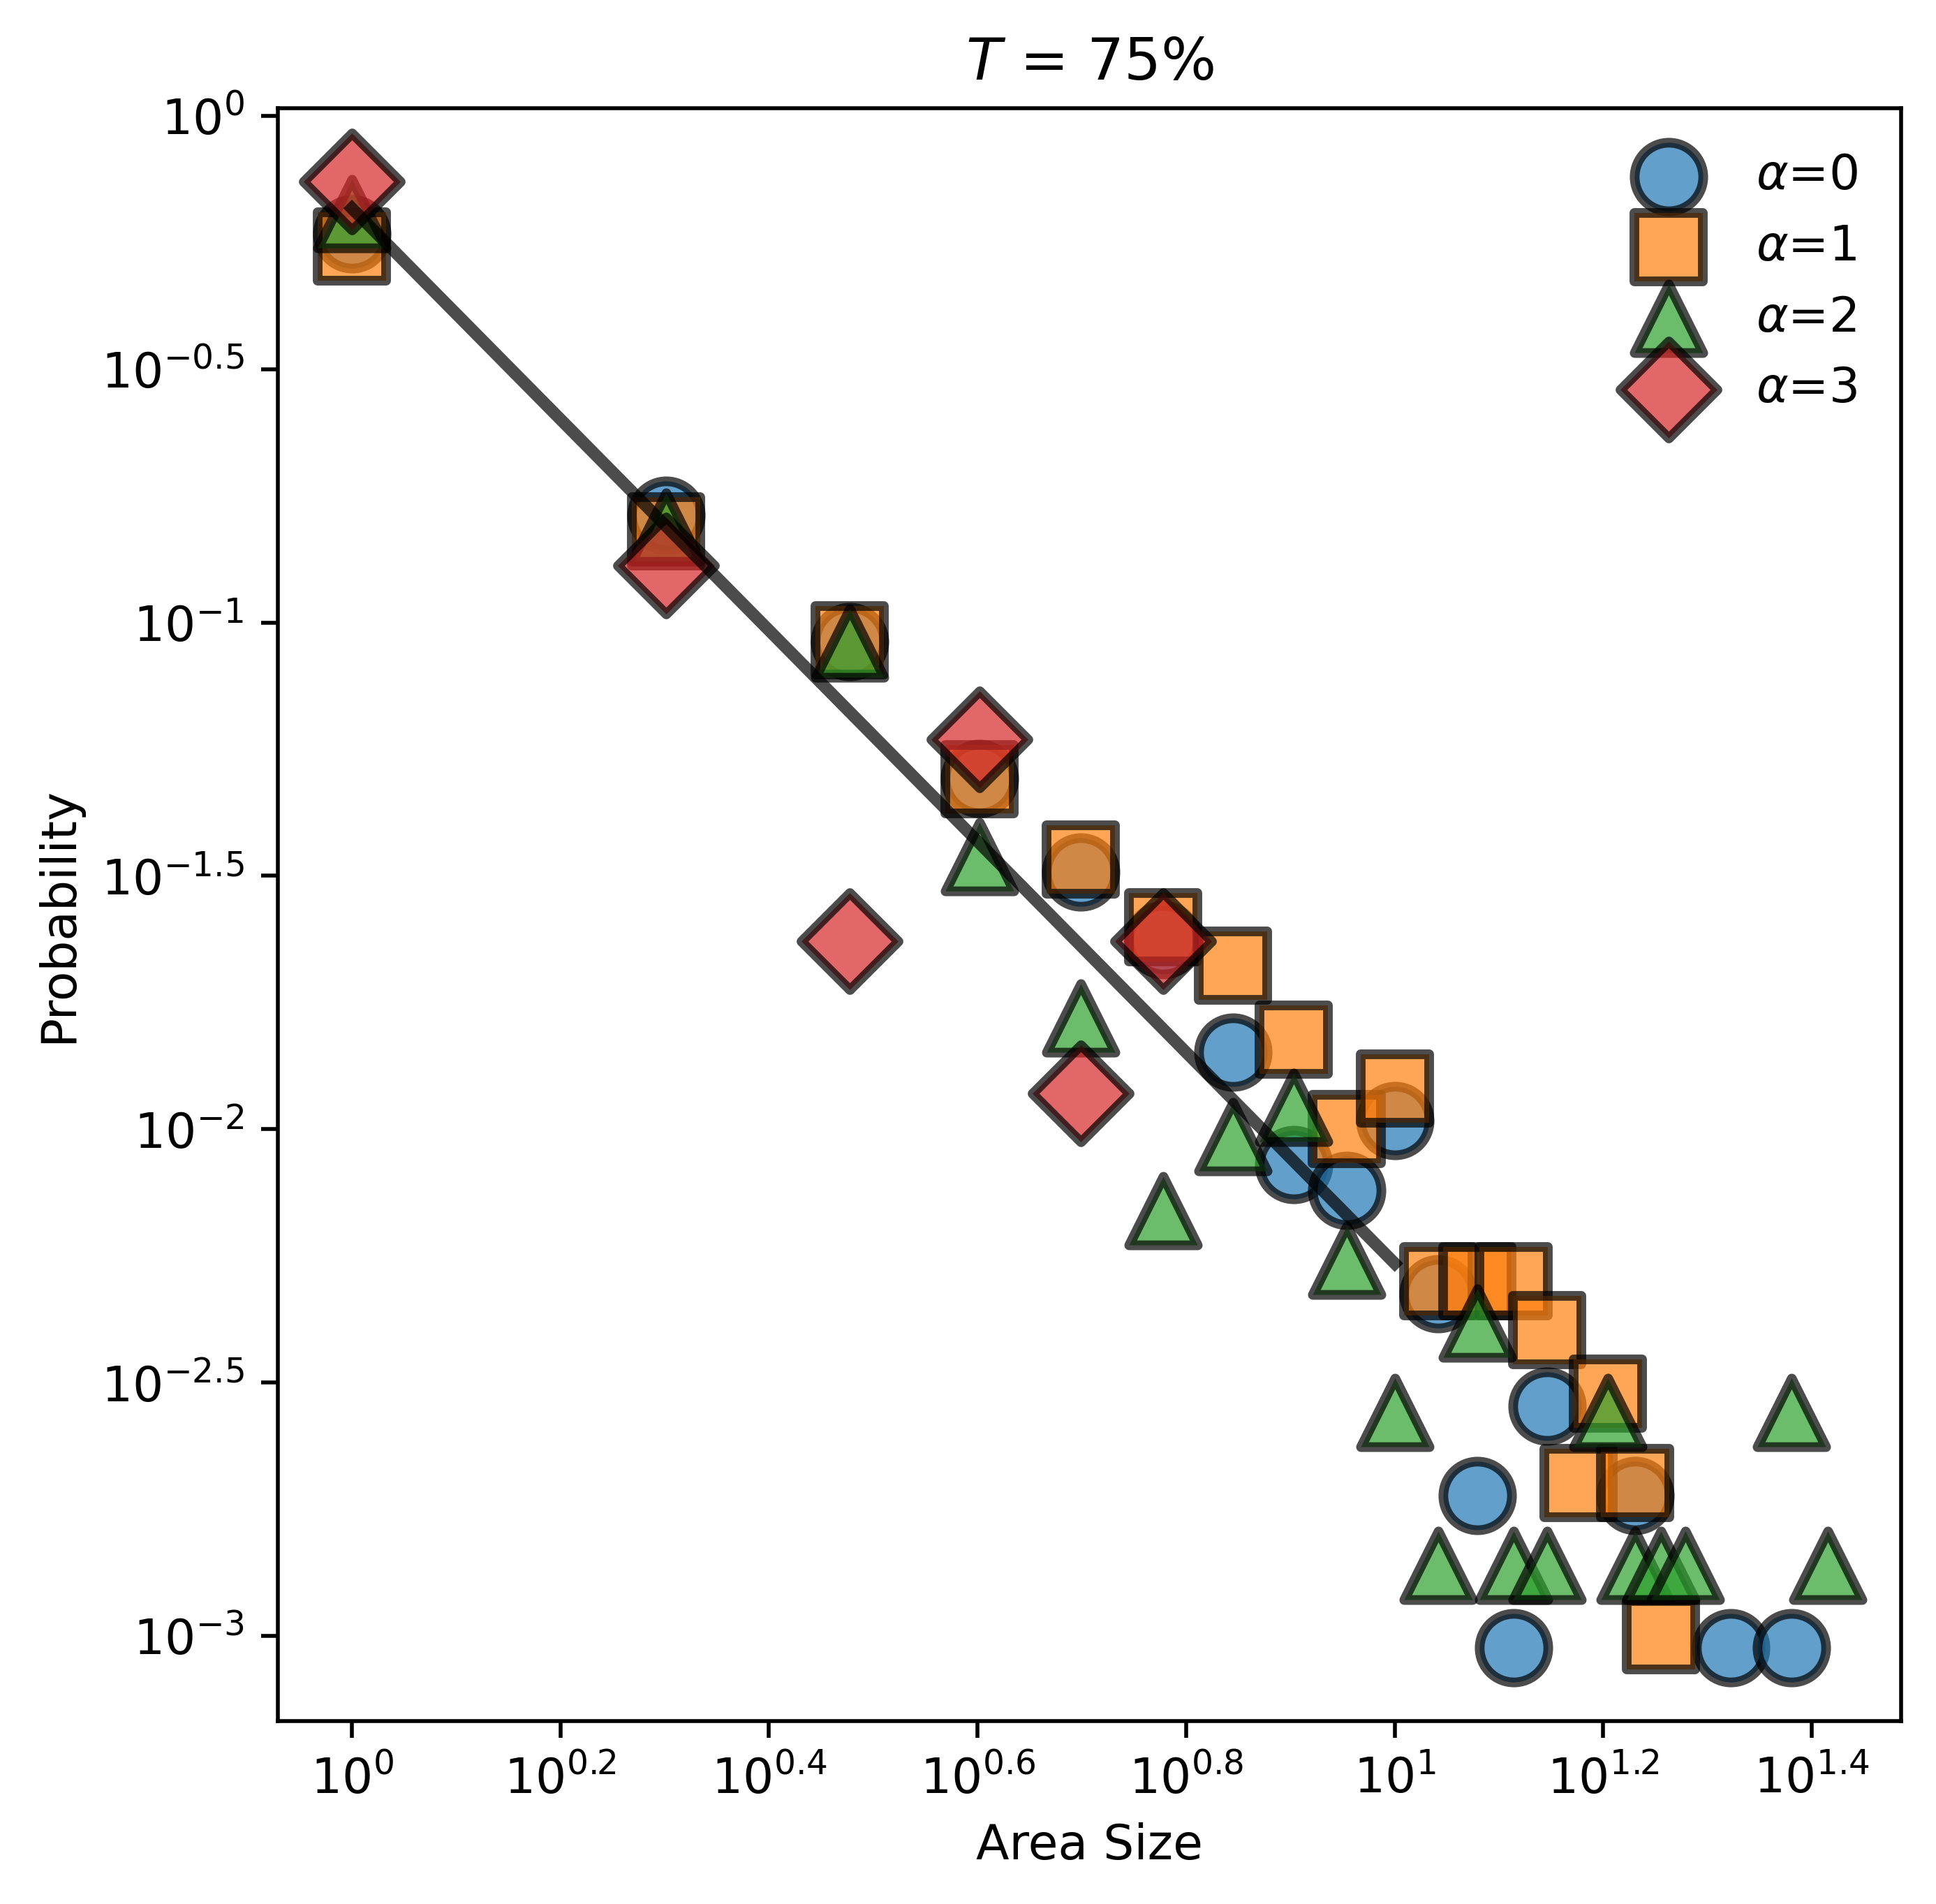

In [29]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter
from area_calculator import calculate_nucleus_area_with_connectors
from collections import Counter

# Load data
def load_matrix(folder, zeta, seed, step):
    for file in os.listdir(folder):
        if re.search(rf'step{step}\.npy$', file):
            return np.load(os.path.join(folder, file))
    raise FileNotFoundError(f"Matrix not found for zeta={zeta}, seed={seed}, step={step}.")

def get_steps(folder):
    steps = [int(re.search(r'step(\d+)\.npy$', file).group(1))
             for file in os.listdir(folder) if re.search(r'step(\d+)\.npy$', file)]
    return sorted(steps)

# Find the index where the plateau begins
def find_plateau_cutoff(x, y, delta_threshold=0.01, consecutive=3):
    count = 0
    for i in range(1, len(y)):
        if abs(y[i] - y[i-1]) < delta_threshold:
            count += 1
            if count >= consecutive:
                return i - consecutive + 1
        else:
            count = 0
    return len(y)

def exp_formatter(x, pos):
    return r"$10^{%g}$" % x


seeds = [4]
normalized_times = [0.25, 0.5, 0.75]
markers = ['o', 's', '^', 'D']

for seed in seeds:
    zeta_list = [0, 1, 2, 3]
    for t in normalized_times:
        fig, ax = plt.subplots(figsize=(6, 6), dpi=500)
        slopes_dict = {}
        intercepts = []

        for zeta_idx, zeta in enumerate(zeta_list):
            marker = markers[zeta_idx]
            folder = f'../../example/fig3-4/powerlaw/matrix/{zeta}/{seed}/'
            steps = get_steps(folder)
            actual_step = steps[int(round((len(steps) - 1) * t))]

            # Load matrix and calculate areas
            matrix = load_matrix(folder, zeta, seed, actual_step)
            areas = calculate_nucleus_area_with_connectors(matrix)
            count = Counter(areas)
            values = sorted(count.keys())
            frequencies = [count[v] for v in values]
            normalized_frequencies = [f / sum(frequencies) for f in frequencies]
            log_values = np.log10(values)
            log_frequencies = np.log10(normalized_frequencies)

            # cutoff for plateau
            cutoff = find_plateau_cutoff(log_values, log_frequencies)
            x_non_plateau = log_values[:cutoff]
            y_non_plateau = log_frequencies[:cutoff]
            mask = x_non_plateau <= 1.5
            x_non_plateau = x_non_plateau[mask]
            y_non_plateau = y_non_plateau[mask]

            slope, intercept, *_ = linregress(x_non_plateau, y_non_plateau)
            slopes_dict[zeta] = slope
            intercepts.append(intercept)

            ax.scatter(x_non_plateau, y_non_plateau, label=rf'$\alpha$={zeta}', marker=marker,
                        edgecolors='black', linewidths=2, s=200, alpha=0.7)


        # Fit the average line
        slopes_average = np.mean(list(slopes_dict.values())) 
        intercepts_average = np.mean(intercepts) 

        # Plot the average line
        x_fit_line = np.linspace(0, 1, 1000)
        fitted_y_average = slopes_average * x_fit_line + intercepts_average
        ax.plot(x_fit_line, fitted_y_average, color='black', linewidth=2.5, alpha=0.7)

        ax.set_title(f"$T$ = {int(t * 100)}%")
        ax.set_xlabel("Area Size")
        ax.set_ylabel("Probability")
        ax.legend(loc='upper right', frameon=False)

        ax.xaxis.set_major_formatter(FuncFormatter(exp_formatter))
        ax.yaxis.set_major_formatter(FuncFormatter(exp_formatter))

        plt.show()



## Exponential decay model

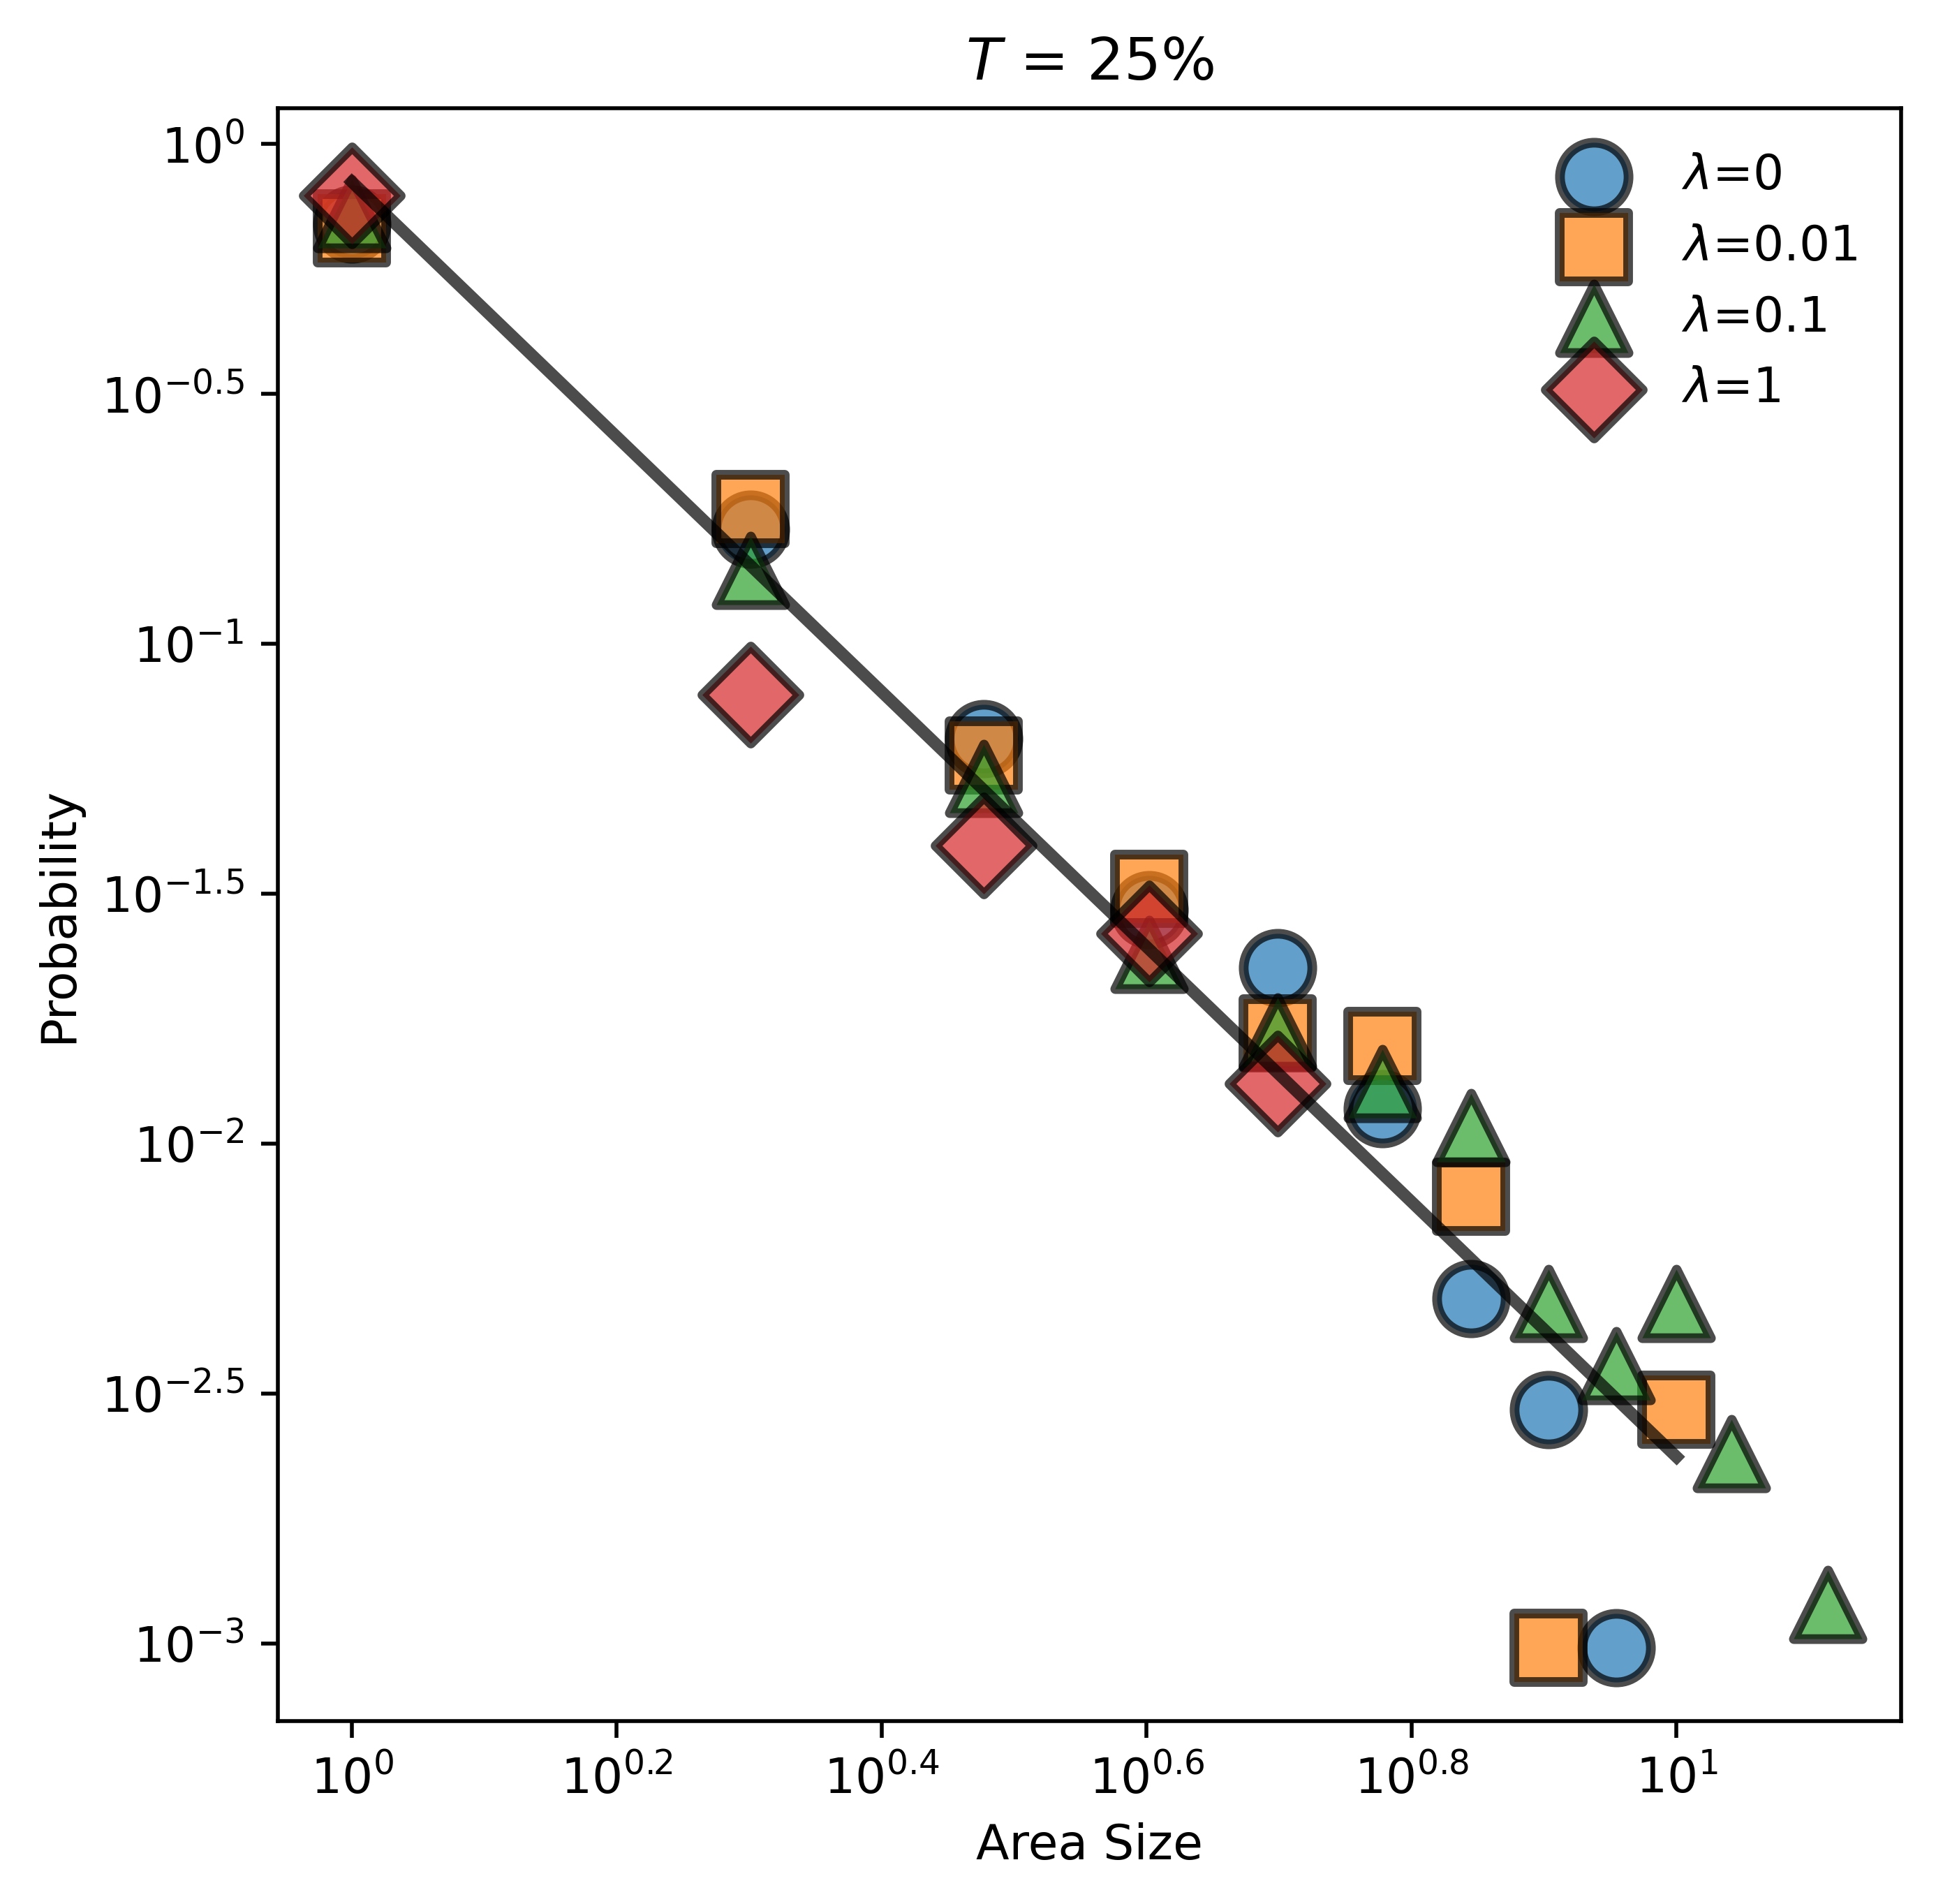

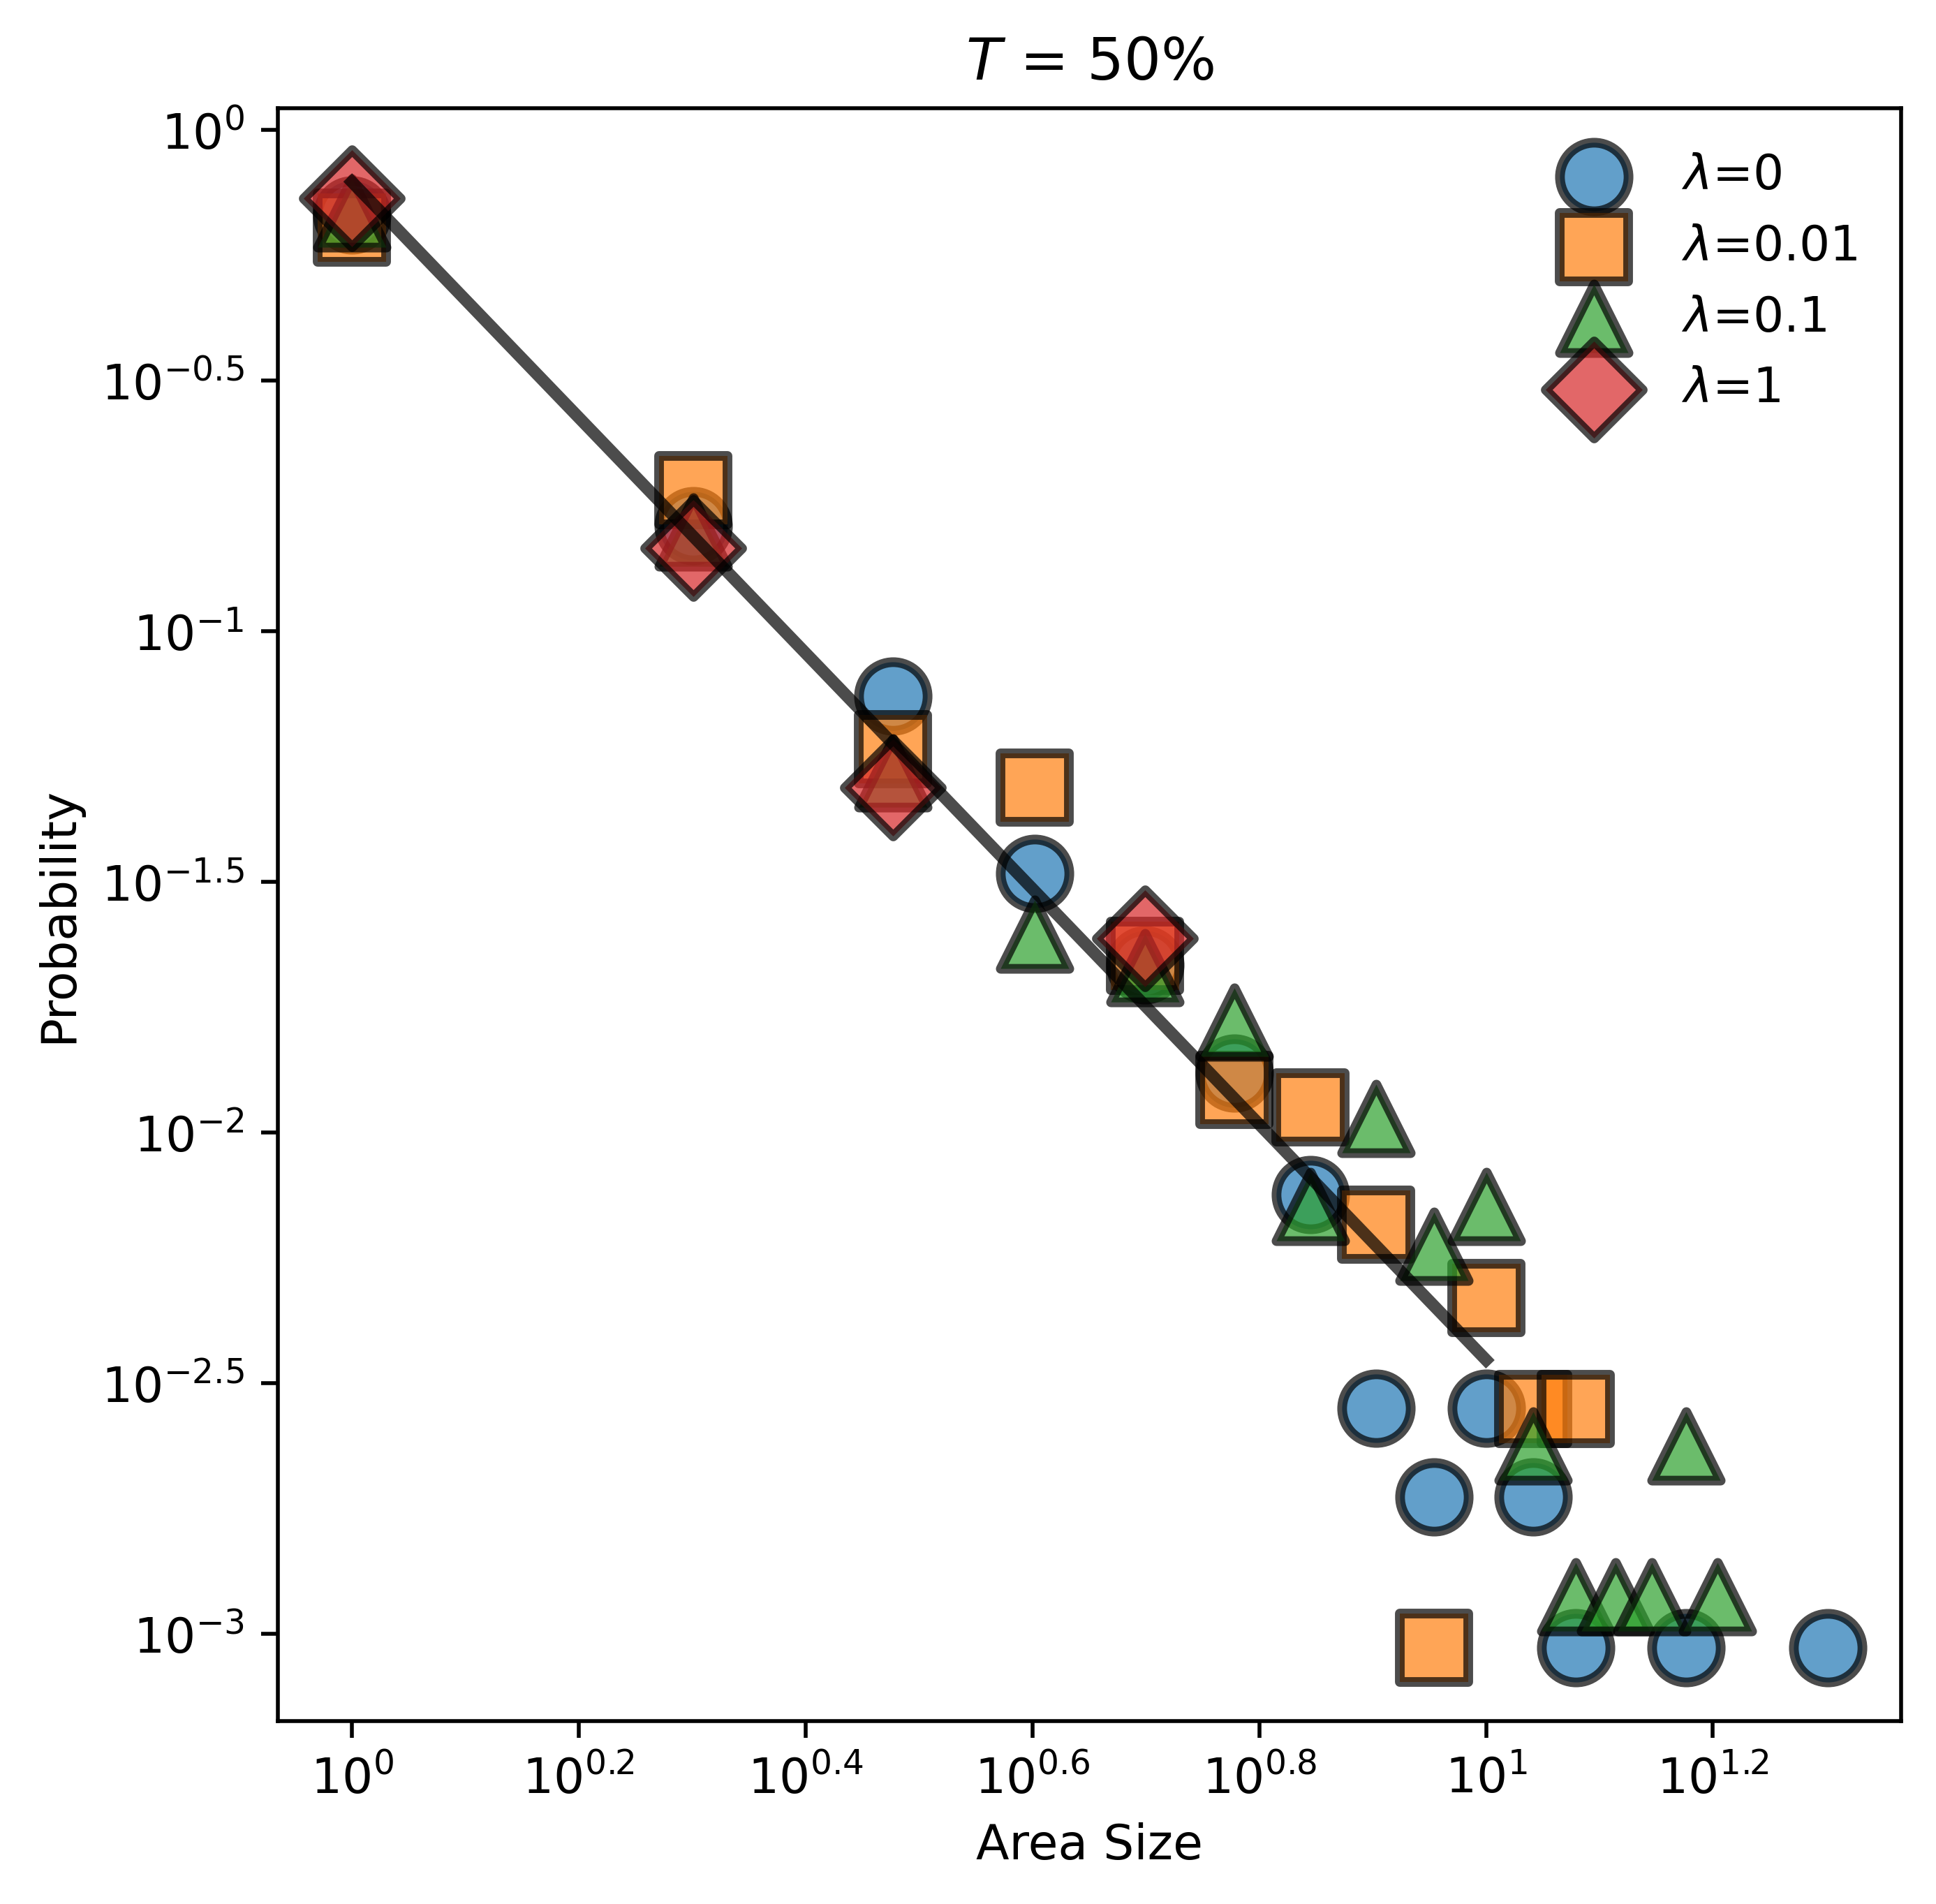

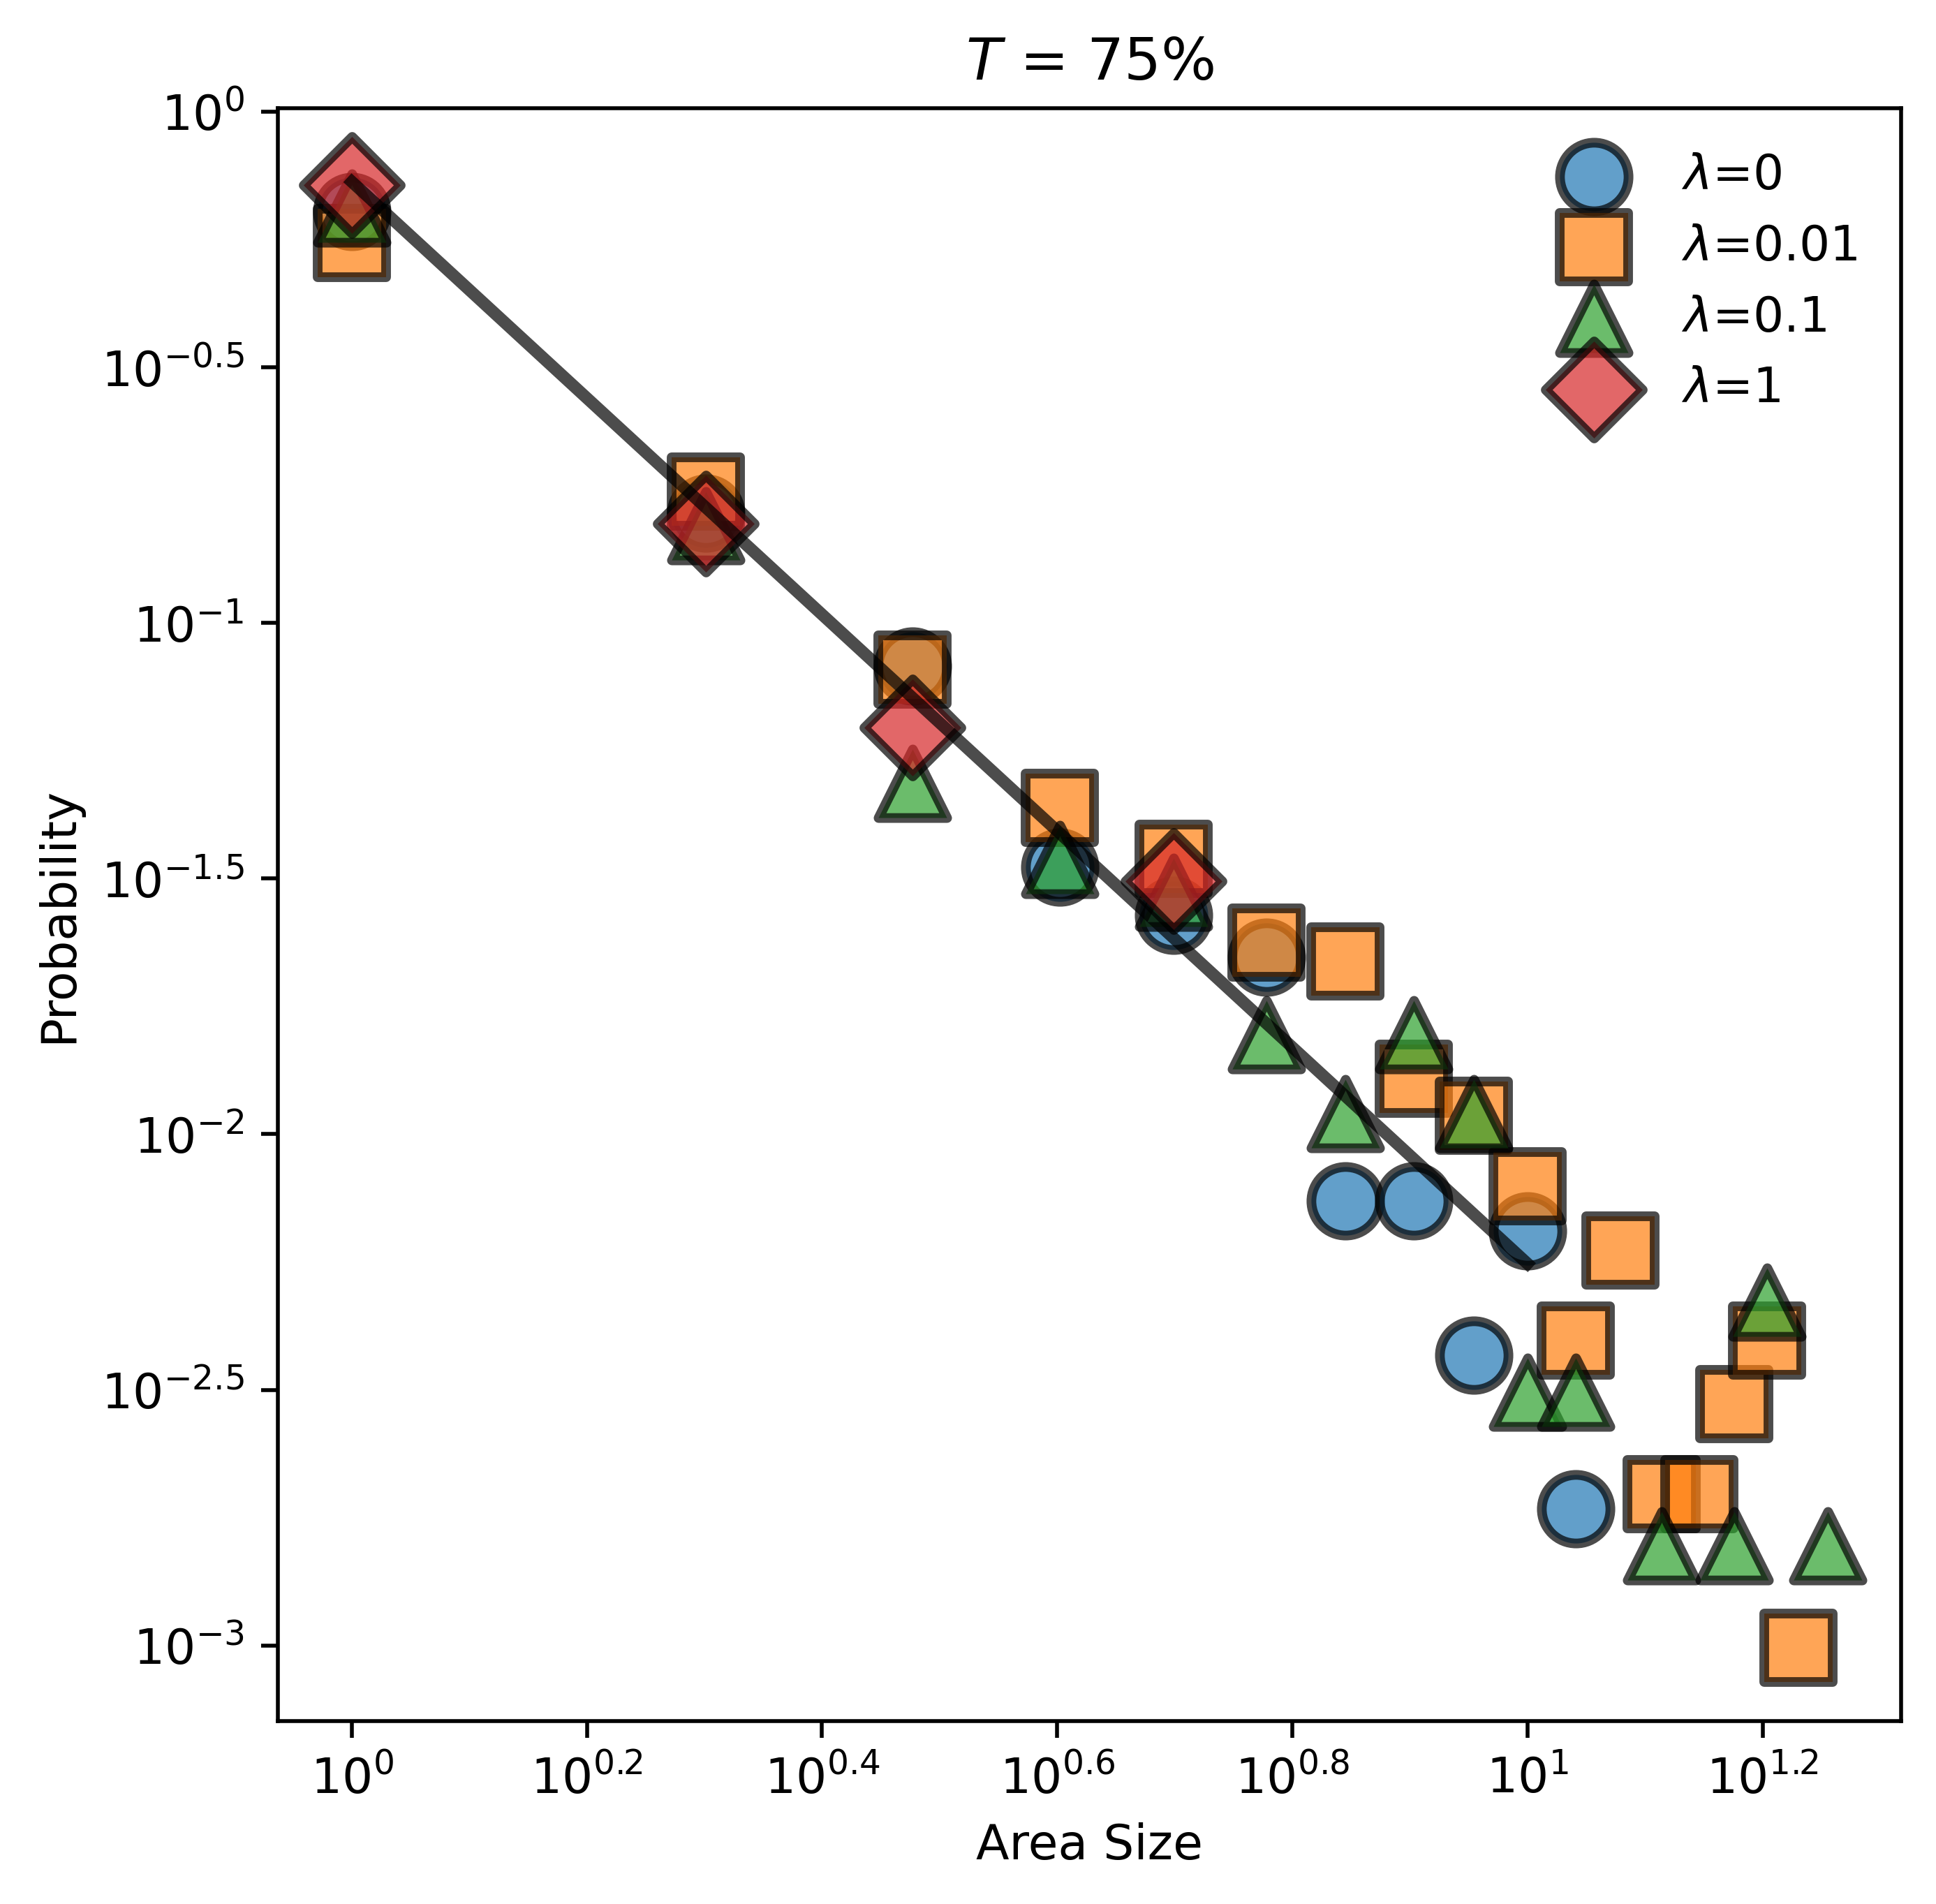

In [28]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter
from area_calculator import calculate_nucleus_area_with_connectors
from collections import Counter

# Load data
def load_matrix(folder, zeta, seed, step):
    for file in os.listdir(folder):
        if re.search(rf'step{step}\.npy$', file):
            return np.load(os.path.join(folder, file))
    raise FileNotFoundError(f"Matrix not found for zeta={zeta}, seed={seed}, step={step}.")

def get_steps(folder):
    steps = [int(re.search(r'step(\d+)\.npy$', file).group(1))
             for file in os.listdir(folder) if re.search(r'step(\d+)\.npy$', file)]
    return sorted(steps)

# Find the index where the plateau begins
def find_plateau_cutoff(x, y, delta_threshold=0.01, consecutive=3):
    count = 0
    for i in range(1, len(y)):
        if abs(y[i] - y[i-1]) < delta_threshold:
            count += 1
            if count >= consecutive:
                return i - consecutive + 1
        else:
            count = 0
    return len(y)

def exp_formatter(x, pos):
    return r"$10^{%g}$" % x


seeds = [3]
normalized_times = [0.25, 0.5, 0.75]
markers = ['o', 's', '^', 'D']

for seed in seeds:
    zeta_list = [0, 0.01, 0.1, 1]
    for t in normalized_times:
        fig, ax = plt.subplots(figsize=(6, 6), dpi=500)
        slopes_dict = {}
        intercepts = []

        for zeta_idx, zeta in enumerate(zeta_list):
            marker = markers[zeta_idx]
            folder = f'../../example/fig3-4/lambdalaw/matrix/{zeta}/{seed}/'
            steps = get_steps(folder)
            actual_step = steps[int(round((len(steps) - 1) * t))]

            # Load matrix and calculate areas
            matrix = load_matrix(folder, zeta, seed, actual_step)
            areas = calculate_nucleus_area_with_connectors(matrix)
            count = Counter(areas)
            values = sorted(count.keys())
            frequencies = [count[v] for v in values]
            normalized_frequencies = [f / sum(frequencies) for f in frequencies]
            log_values = np.log10(values)
            log_frequencies = np.log10(normalized_frequencies)

            # cutoff for plateau
            cutoff = find_plateau_cutoff(log_values, log_frequencies)
            x_non_plateau = log_values[:cutoff]
            y_non_plateau = log_frequencies[:cutoff]
            mask = x_non_plateau <= 1.5
            x_non_plateau = x_non_plateau[mask]
            y_non_plateau = y_non_plateau[mask]

            slope, intercept, *_ = linregress(x_non_plateau, y_non_plateau)
            slopes_dict[zeta] = slope
            intercepts.append(intercept)

            ax.scatter(x_non_plateau, y_non_plateau, label=rf'$\lambda$={zeta}', marker=marker,
                        edgecolors='black', linewidths=2, s=200, alpha=0.7)

        # Fit the average line
        slopes_average = np.mean(list(slopes_dict.values())) if slopes_dict else 0
        intercepts_average = np.mean(intercepts) if intercepts else 0

        # Plot the average line
        x_fit_line = np.linspace(0, 1, 1000)
        fitted_y_average = slopes_average * x_fit_line + intercepts_average
        ax.plot(x_fit_line, fitted_y_average, color='black', linewidth=2.5, alpha=0.7)

        ax.set_title(f"$T$ = {int(t * 100)}%")
        ax.set_xlabel("Area Size")
        ax.set_ylabel("Probability")
        ax.legend(loc='upper right', frameon=False)

        ax.xaxis.set_major_formatter(FuncFormatter(exp_formatter))
        ax.yaxis.set_major_formatter(FuncFormatter(exp_formatter))

        plt.show()

